# Big-Data for Computational Finance - Assignment 1


#### Importing Libraries (NUMPY,RANDOM, MATPLOTLIB AND  SCIPY.OPTIMIZATION )

In [1]:
import numpy as np
import random 
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Registration numbere is (2320921)
reg_num = input("ENTER YOUR REGISTRATION NUMBER : ")

ENTER YOUR REGISTRATION NUMBER :  2320921


# " ---Task no 1---"

In [4]:
digit1 = int(reg_num[-2])
digit2 = int(reg_num[-1])


def dummy(digit1,digit2):
    dummy_rep = 10 * digit1 + digit2 
    for i in range(dummy_rep):
        dummy= random.uniform(0, 1)
    return dummy

# generating correlation matrix
def correlation_matrix(n):
    Cr = np.array([[0]*n for _ in range(n)], dtype=float)
    for i in range(n):
        for j in range(n):
            Cr[i][j] = (-1)**abs(i-j) / (abs(i-j) + 1)
    return Cr

# generating sigma and mmu
def gen_sigma_mu(n):
    sigma = np.zeros((n, 1), dtype=float)
    mu = np.zeros((n, 1), dtype=float)
    
    sigma[0] = 2 
    mu[0] = 3 

    for k in range(n-1):
        sigma[k+1] = sigma[k] + 2 * random.uniform(0, 1)
        mu[k+1] = mu[k] + 1
    
    mu = mu.flatten()
    return sigma, mu.flatten()# return sigma and mmu
# generating   covariance  matrix
def covariance_matrix(Cr, sigma):
    n = len(sigma)
    diag = np.zeros((n, n), dtype=float)
    np.fill_diagonal(diag, sigma.flatten())
    
    C2 = np.matmul(np.matmul(diag, Cr), diag)
    C = 0.5 * (C2 + C2.T)
    
    return C  #return covariance matrix


def main():
    n = 10
    Cr = correlation_matrix(n)
    sigma, mu = gen_sigma_mu(n)
    C = covariance_matrix(Cr, sigma)
    return mu,C
    print("Expected Returns=\n", mu)
    print("Covariance Matrix=\n", C)
    

#### Expected Return and  Covariance Matrix

In [5]:
mu,C =main()
main()

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([[  4.        ,  -3.05111266,   2.62980416,  -2.76194911,
           2.96455275,  -2.69108267,   2.63025833,  -2.61933626,
           2.36970807,  -2.19936418],
        [ -3.05111266,   9.30928848,  -6.01787158,   5.61801193,
          -5.65324027,   4.92647785,  -4.68137512,   4.5667943 ,
          -4.06701355,   3.72805994],
        [  2.62980416,  -6.01787158,  15.56070734, -10.89507789,
           9.74524144,  -7.96164796,   7.26291752,  -6.8883414 ,
           6.00930144,  -5.42240351],
        [ -2.76194911,   5.61801193, -10.89507789,  30.5134515 ,
         -20.46985954,  14.86526677, -12.71311938,  11.57515751,
          -9.81751965,   8.67790276],
        [  2.96455275,  -5.65324027,   9.74524144, -20.46985954,
          54.92858119, -29.91696197,  22.7428237 , -19.41290126,
          15.80653031, -13.5836065 ],
        [ -2.69108267,   4.92647785,  -7.96164796,  14.86526677,
         -29.91696197,  65.17733351

#### Calculating Risk (Variance)

In [6]:
def calculate_sigmas_mus(r_values, mu, C):
    # Define the number of assets
    n = len(mu)
    
    sigmas = []
    mus = []
    
    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x
    
    # Define the constraints
    def constraint_mu(x, target_mu, mu):
        return x @ mu - target_mu
    
    def constraint_sum(x):
        return np.sum(x) - 1
    
    # Bounds for the weights (non-negative)
    bounds = [(0, None) for _ in range(n)]
    
    # Solve the problem for each r
    for target_mu in r_values:
        # Initial guess for the weights
        x0 = np.ones(n) / n
        
        # Define the constraints 
        constraints = [
            {'type': 'eq', 'fun': constraint_mu, 'args': (target_mu, mu)},
            {'type': 'eq', 'fun': constraint_sum}
        ]
        
        # Solve the optimization problem
        result = minimize(objective, x0, args=(C,), bounds=bounds, constraints=constraints)
        
        # Check if the problem was solved successfully
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            # If the problem was not solved successfully, set sigma_x and mu_x to np.nan
            sigma = np.nan
            mu_x = np.nan
        
        # Store the values
        sigmas.append(round(sigma, 2))
        mus.append(round(mu_x, 2))
    
    return sigmas, mus

r_values = np.arange(2.00, 9.25, 0.25)
# Call the calculate_sigmas_mus function
sigmas_1, mus_1 = calculate_sigmas_mus(r_values, mu, C)



### Task no # 1 plot

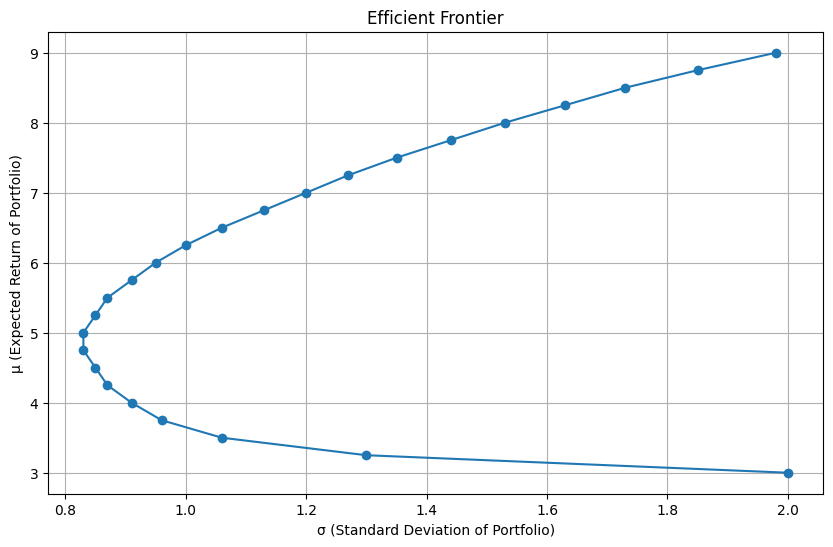

In [7]:
# Plot the results

def plot_task_1(sigmas_1, mus_1):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_1, mus_1, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.grid(True)
     plt.savefig('img_task1.png')
     plt.show()

# calling function for task1 plot
plot_task_1(sigmas_1, mus_1)

# " ---Task no 2 ---"

In [8]:
e = np.ones(len(mu))
def calculate_sigmas_mus2(r_values, mu, C):
    # Define the number of assets
    n = len(mu)
    # Initialize lists to store sigma and mu values
    sigma_values = []
    mu_values = []
    
    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x
    # Bounds for the weights (non-negative)
    bounds = [(0, None) for _ in range(n)]
    
    # Solve the optimization problem for each r
    for r in r_values:
         # Define the objective function (variance)
        # Initial guess for the weights
        x0 = np.ones(n) / n

        # Define the constraints in the form required by `scipy.optimize.minimize`
        constraints = (
        {'type': 'eq', 'fun': lambda x: mu.T @ x - r},   # Expected return constraint
        {'type': 'ineq', 'fun': lambda x: 1 - e.T @ x},  # Sum of fractions constraint
        {'type': 'ineq', 'fun': lambda x: x}   )          # Non-negativity constraint
             
        # Solve the optimization problem
        result = minimize(objective, x0, args=(C,), bounds=bounds, constraints=constraints)
        
        # Check if the problem was solved successfully
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            # If the problem was not solved successfully, set sigma_x and mu_x to np.nan
            sigma_x = np.nan
            mu_x = np.nan
        
        # Store the values
        sigma_values.append(round(sigma_x, 2))
        mu_values.append(round(mu_x, 2))
    
    return sigma_values, mu_values

# Call the function
sigmas_2, mus_2 = calculate_sigmas_mus2(r_values, mu, C)


### Task no # 2 plot

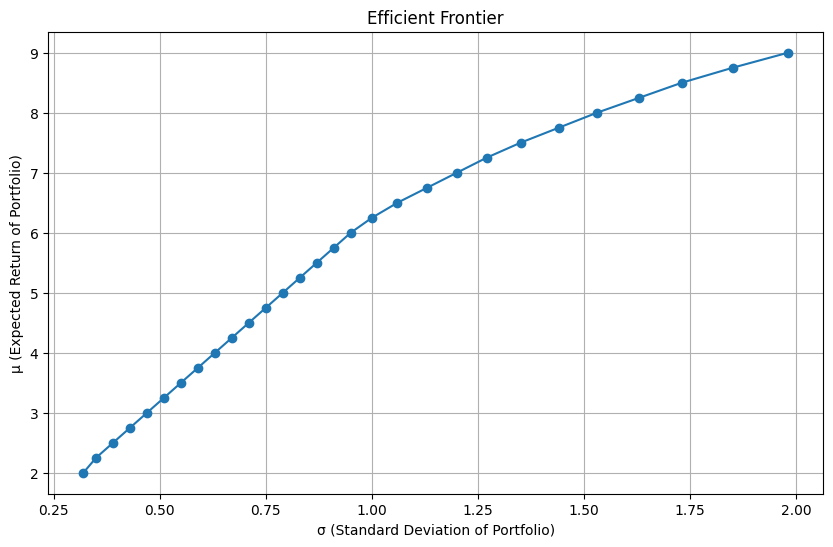

In [9]:
# Plot the result 
def plot_task_2(sigmas_2, mus_2):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_2, mus_2, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.grid(True)
     plt.savefig('img_task2.png')
     plt.show()
     
# calling function for task1 plot
plot_task_2(sigmas_2, mus_2)

### Task 2 plot -Compared- Task 1 plot

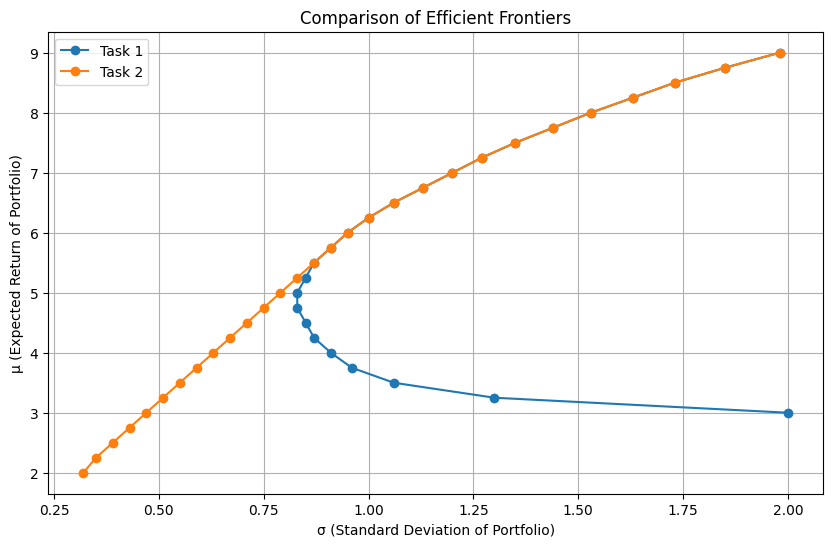

In [10]:
def compare_plots_1_2(sigmas_1, mus_1, sigmas_2, mus_2):
    plt.figure(figsize=(10, 6))
    plt.xlabel('σ (Standard Deviation of Portfolio)')
    plt.ylabel('μ (Expected Return of Portfolio)')
    plt.title('Comparison of Efficient Frontiers')
    plt.plot(sigmas_1, mus_1, marker='o', label='Task 1')
    plt.plot(sigmas_2, mus_2, marker='o', label='Task 2')
    plt.grid(True)
    plt.legend()
    plt.savefig('img_compare(1_2).png')
    plt.show()
compare_plots_1_2(sigmas_1, mus_1, sigmas_2, mus_2)

# " ---Task no 3 ---"

In [11]:
def calculate_sigmas_mus2(r_values, mu, C):
    # Define the number of assets
    n = len(mu)
    # Initialize lists to store sigma and mu values
    sigma_values = []
    mu_values = []
    
    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x
    # Bounds for the weights (non-negative)
    bounds = [(0, None) for _ in range(n)]
    
    # Solve the optimization problem for each r
    for r in r_values:
         # Define the objective function (variance)
        # Initial guess for the weights
        x0 = np.ones(n) / n

        # Define the constraints in the form required by `scipy.optimize.minimize`
        constraints = [
                {'type': 'ineq', 'fun': lambda x: mu @ x - r},  # Expected return constraint
                {'type': 'eq', 'fun': lambda x: e @ x - 1},     # Sum of fractions constraint
                {'type': 'ineq', 'fun': lambda x: x}    ]        # Non-negativity constraint

             
        # Solve the optimization problem
        result = minimize(objective, x0, args=(C,), bounds=bounds, constraints=constraints)
        
        # Check if the problem was solved successfully
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            # If the problem was not solved successfully, set sigma_x and mu_x to np.nan
            sigma_x = np.nan
            mu_x = np.nan
        
        # Store the values
        sigma_values.append(round(sigma_x, 2))
        mu_values.append(round(mu_x, 2))
    
    return sigma_values, mu_values

# Call the function
sigmas_3, mus_3 = calculate_sigmas_mus2(r_values, mu, C)


### Task no # 3 plot

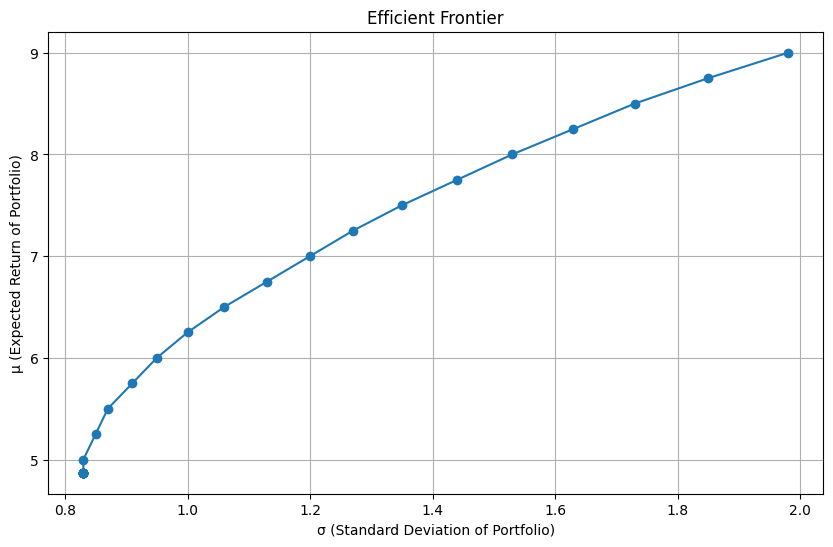

In [12]:

# Plot the result 
def plot_task_3(sigmas_3, mus_3):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_3, mus_3, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.savefig('img_task3.png')
     plt.grid(True)
     plt.savefig('img_task3.png')
     plt.show()
     
# calling function for task 3 plot
plot_task_3(sigmas_3, mus_3)

### Task 3 plot -Compared- Task 1 plot

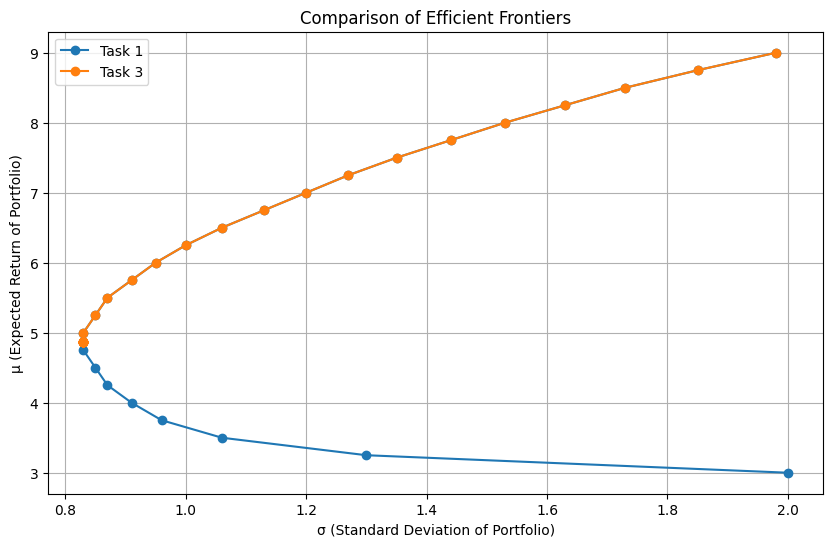

In [13]:
def compare_plots_1_3(sigmas_1, mus_1, sigmas_3, mus_3):
    plt.figure(figsize=(10, 6))
    plt.xlabel('σ (Standard Deviation of Portfolio)')
    plt.ylabel('μ (Expected Return of Portfolio)')
    plt.title('Comparison of Efficient Frontiers')
    plt.plot(sigmas_1, mus_1, marker='o', label='Task 1')
    plt.plot(sigmas_3, mus_3, marker='o', label='Task 3')
    plt.grid(True)
    plt.legend()
    plt.savefig('img_compare(1_3).png')
    plt.show()
compare_plots_1_3(sigmas_1, mus_1, sigmas_3, mus_3)

# " ---Task no 4 ---"

In [14]:
def calculate_sigmas_mus4(r_values, mu, C):
    sigma_values = []
    mu_values = []
    n = len(mu)
    # Vector of ones
    e = np.ones(n)

    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x

    # Solve the optimization problem for each r
    for r in r_values:
        # Define the constraints
        constraints = [
            {'type': 'eq', 'fun': lambda x, mu=mu: mu.T @ x - r},  # Expected return constraint
            {'type': 'eq', 'fun': lambda x: e.T @ x - 1}           # Sum of fractions constraint
        ]
        
        # Initial guess for the weights (equal weights)
        x0 = np.ones(n) / n
        
        bounds = [(None, None) for _ in range(n)]
        
        # Minimize the objective function
        result = minimize(objective, x0, args=(C,), constraints=constraints, bounds=bounds)
        
        # Check if the problem was solved optimally
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            
            sigma_x = np.nan
            mu_x = np.nan
        
        # Store the values
        sigma_values.append(sigma_x)
        mu_values.append(mu_x)
    
    # Convert lists to numpy arrays for plotting
    sigma_values = np.array(sigma_values)
    mu_values = np.array(mu_values)
    
    return sigma_values, mu_values


# Call the function
sigmas_4, mus_4 = calculate_sigmas_mus4(r_values, mu, C)


### Task no # 4 plot

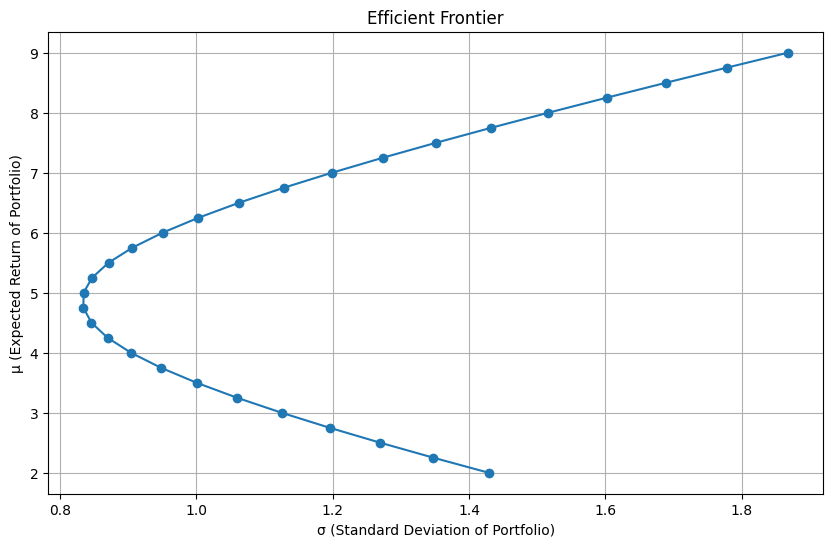

In [15]:
# Plot the result 
def plot_task_4(sigmas_4, mus_4):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_4, mus_4, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.grid(True)
     plt.savefig('img_task4.png')
     plt.show()

# calling function for task 4 plot
plot_task_4(sigmas_4, mus_4)

### Task 4 plot -Compared- Task 1 plot

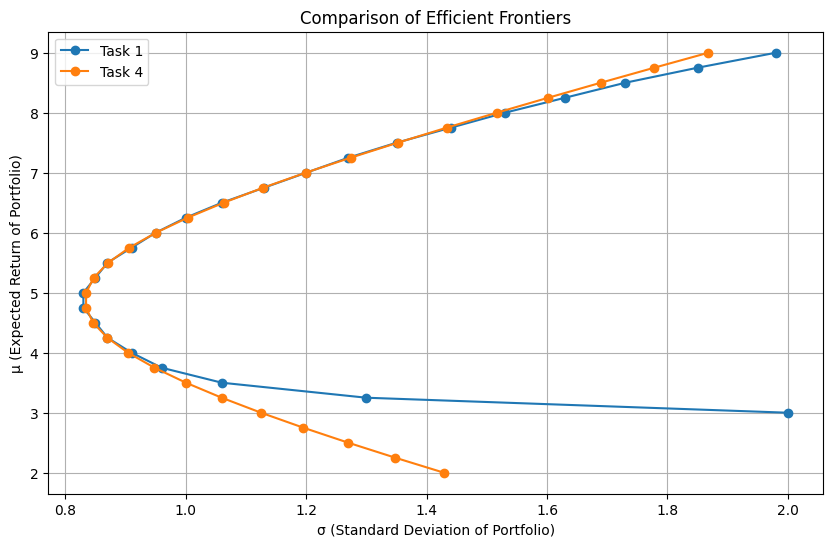

In [17]:
def compare_plots_1_4(sigmas_1, mus_1, sigmas_4, mus_4):
    plt.figure(figsize=(10, 6))
    plt.xlabel('σ (Standard Deviation of Portfolio)')
    plt.ylabel('μ (Expected Return of Portfolio)')
    plt.title('Comparison of Efficient Frontiers')
    plt.plot(sigmas_1, mus_1, marker='o', label='Task 1')
    plt.plot(sigmas_4, mus_4, marker='o', label='Task 4')
    plt.grid(True)
    plt.legend()
    plt.savefig('img_compare(1_4).png')
    plt.show()
compare_plots_1_4(sigmas_1, mus_1, sigmas_4, mus_4)